In [54]:
import numpy as np
import pandas as pd 
import scanpy as sc
import matplotlib.pyplot as plt

In [55]:

scdata = sc.read_h5ad('/home/rsun@ZHANGroup.local/sly_data/data/final_hvg.h5ad')
scdata

AnnData object with n_obs × n_vars = 26222 × 2670
    obs: 'species', 'tissues', 'samples', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cluster', 'celltype', 'coarse_celltype', 'eco', 'leiden_R', 'new_leiden', 'new_anno'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'eco_colors', 'hvg', 'leiden', 'leiden_R', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'new_anno_colors', 'new_leiden_colors', 'pca', 'rank_genes_groups', 'species_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
#sc.pl.umap(scdata, color = ['new_anno'])

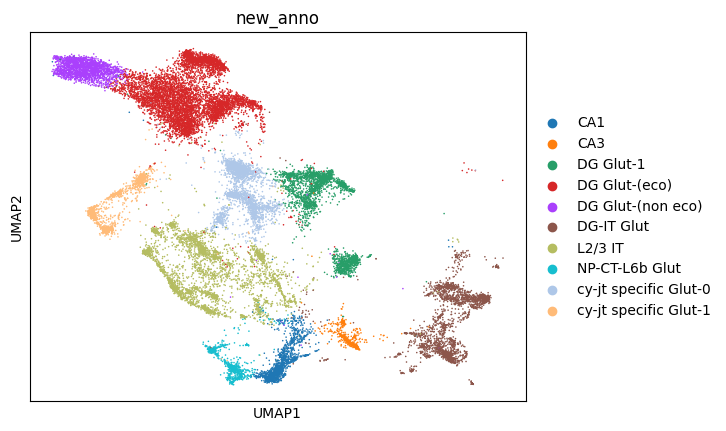

In [56]:
drop_id = scdata.obs.new_anno == 'GABA'
scdata = scdata[~drop_id] 
sc.pl.umap(scdata, color = 'new_anno')

In [5]:
#sc.pp.neighbors(scdata, use_rep = 'X_pca_harmony')
#sc.tl.umap(scdata, min_dist= 0.1)
#sc.pl.umap(scdata, color = 'new_anno')

/home/rsun@ZHANGroup.local/anaconda3/envs/scvi/lib/python3.11/site-packages/scanpy/tools/_umap.py:181: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_uns] = dict(params=dict(a=a, b=b))


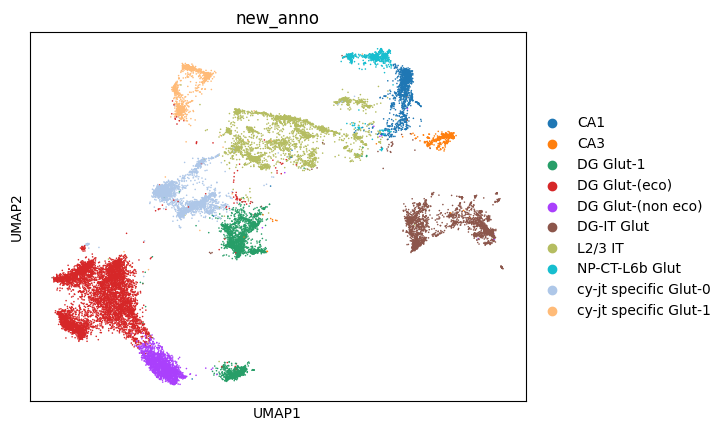

In [57]:
sc.tl.umap(scdata, min_dist= 0.01, spread =1)
sc.pl.umap(scdata, color = 'new_anno')

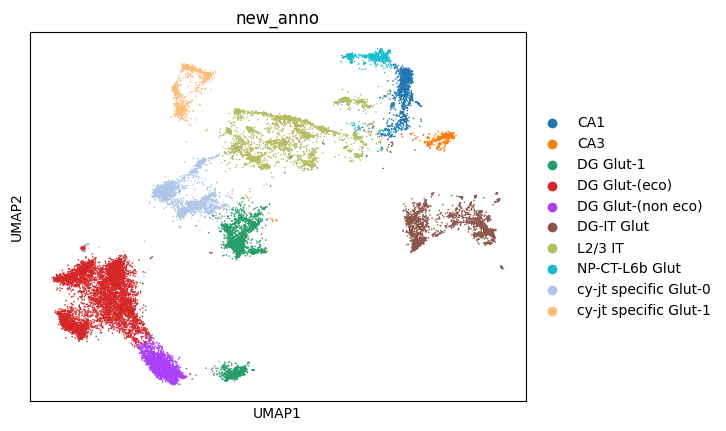

In [59]:
umap_data = scdata.obsm['X_umap']
x = umap_data[:, 0]
y = umap_data[:, 1]

diff_id = scdata.obs.new_anno == 'DG Glut-(eco)'
drop_1 = np.logical_and(diff_id, x > 1)
drop_2 = np.logical_and(diff_id, y > 3)

drop = np.logical_or(drop_1, drop_2)
#drop.sum()

sc.pl.umap(scdata[~drop,:], color = 'new_anno')

In [60]:
scdata = scdata[~drop,:]

umap_coords = scdata.obsm['X_umap']

from sklearn.neighbors import NearestNeighbors

# 构建 k-近邻图
knn = NearestNeighbors(n_neighbors=10).fit(umap_coords)
distances, indices = knn.kneighbors(umap_coords)

# 计算平均距离
avg_distances = np.mean(distances, axis=1)

# 设定阈值，删除超出阈值的点
threshold = np.percentile(avg_distances, 95)
valid_mask = avg_distances <= threshold

filtered_umap = umap_coords[valid_mask]

# 重新绘制 UMAP 图
#sc.pl.umap(scdata[valid_mask,:], color = 'new_anno')

scdata = scdata[valid_mask,:]

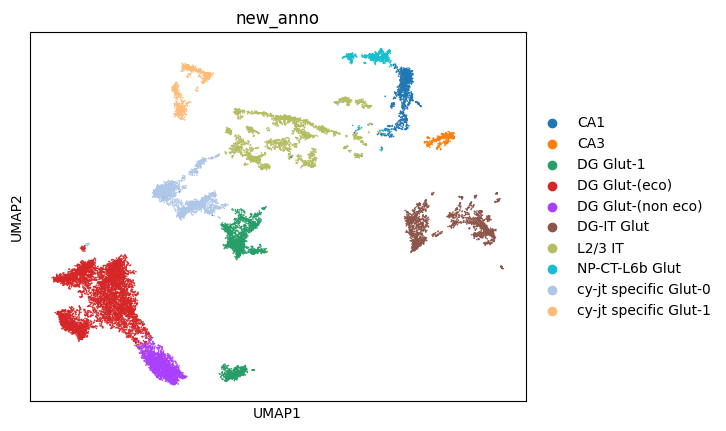

In [61]:
sc.pl.umap(scdata, color = 'new_anno')
#ax = sc.pl.umap(scdata, color = 'new_anno', show = False)
#plt.savefig('hm_neuron_umap.pdf', bbox_inches='tight')

In [16]:
#ax = sc.pl.umap(scdata, color = 'species', show = False)
#plt.savefig('hm_neuron_umap_species.pdf', bbox_inches='tight')

In [17]:
#ax = sc.pl.umap(scdata, color = 'eco', show = False)
#plt.savefig('hm_neuron_umap_eco.pdf', bbox_inches='tight')

## HVG 

/home/rsun@ZHANGroup.local/anaconda3/envs/scvi/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:639: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


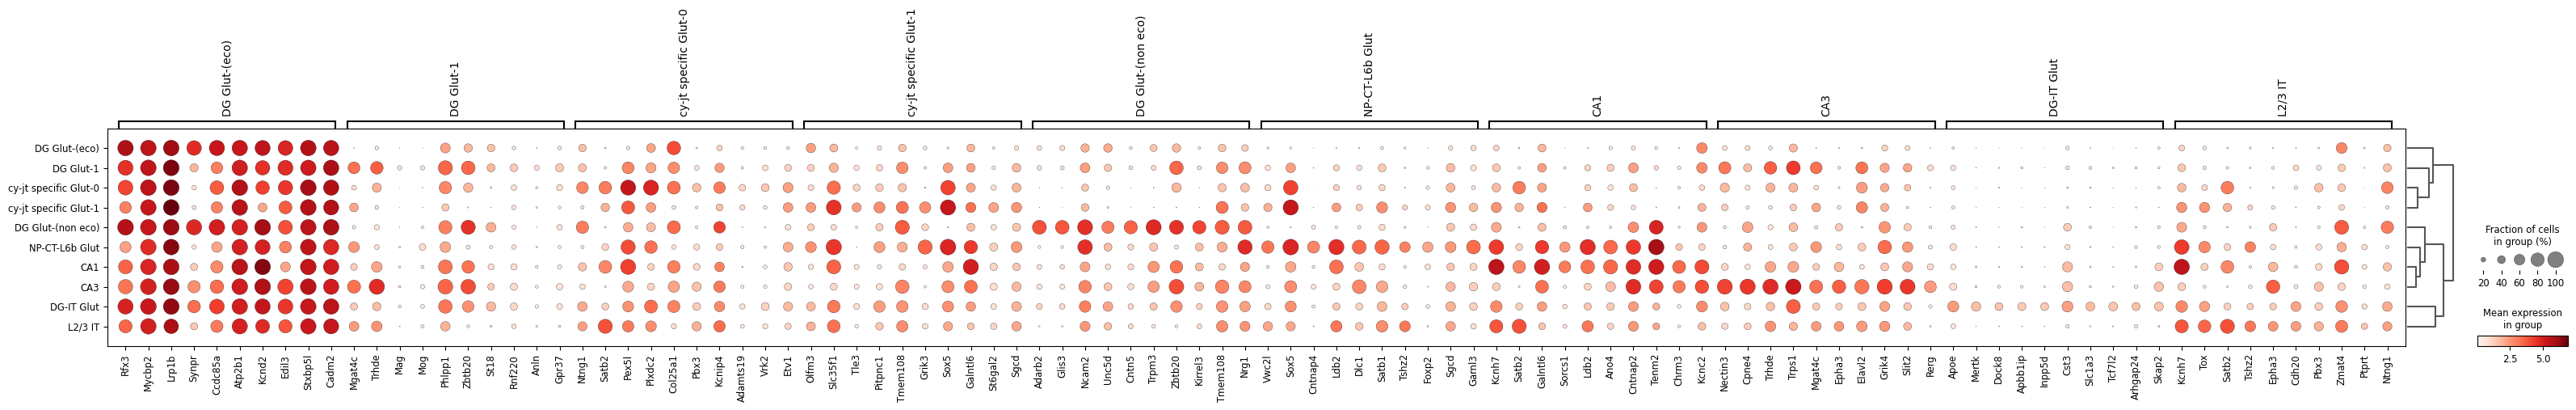

In [62]:
sc.tl.rank_genes_groups(scdata, groupby = 'new_anno', use_raw = True, method = 'logreg')
sc.pl.rank_genes_groups_dotplot(scdata, min_logfoldchange= 2)

In [53]:
scdata.write_h5ad('hm_neuron.h5ad')

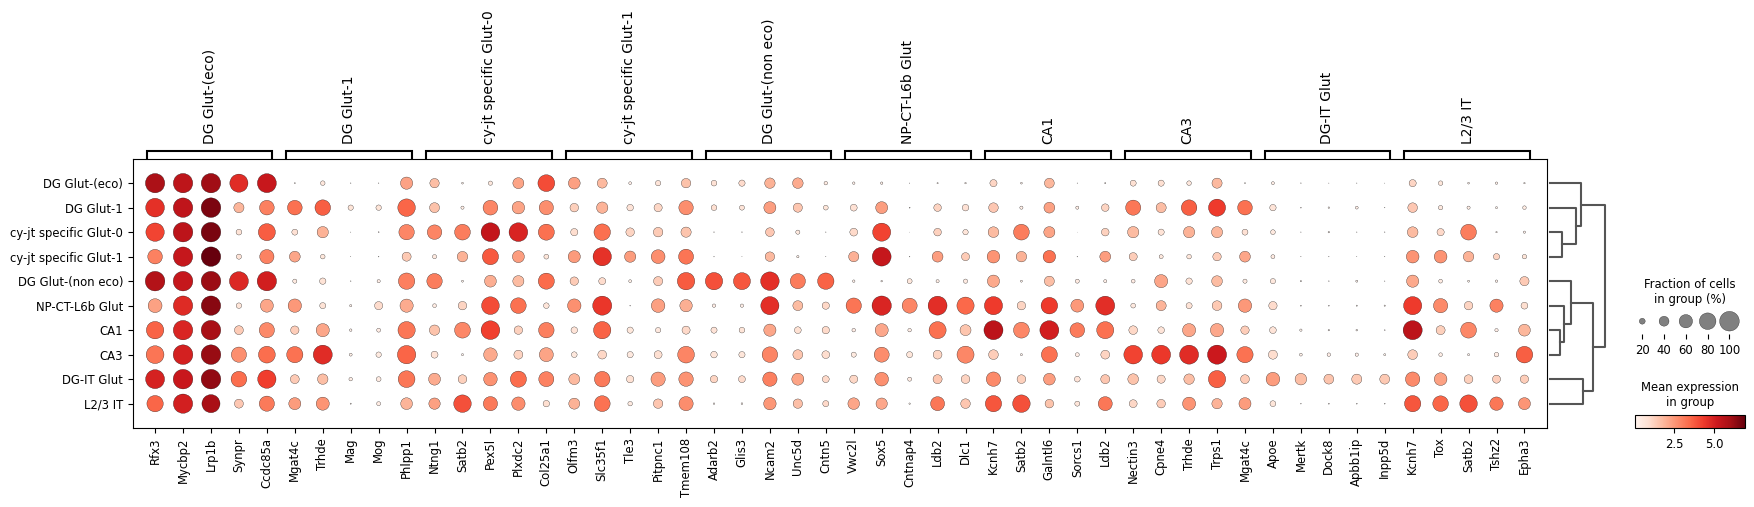

In [29]:
sc.pl.rank_genes_groups_dotplot(
    scdata,
    n_genes=5,
    #values_to_plot='logfoldchanges', 
    #cmap='bwr',
    #vmin=-4,
    #vmax=4,
    #min_logfoldchange=1,
    #colorbar_title='log fold change'
)

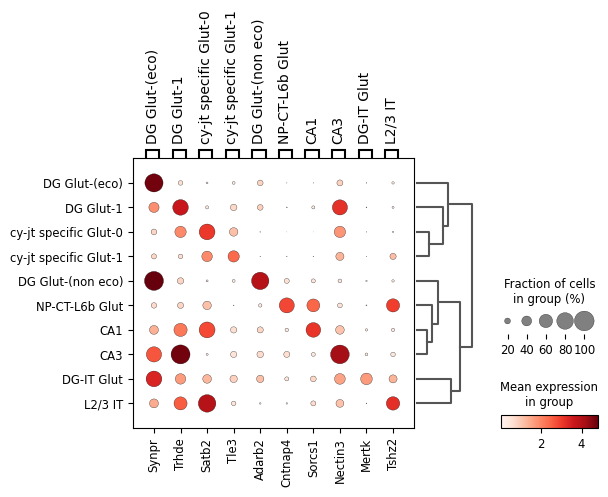

In [64]:
marker_dic = {'DG Glut-(eco)': ['Synpr'],
              'DG Glut-1': ['Trhde'],
              'cy-jt specific Glut-0': ['Satb2'],
              'cy-jt specific Glut-1': ['Tle3'],
              'DG Glut-(non eco)': ['Adarb2'],
              'NP-CT-L6b Glut': ['Cntnap4'], 
              'CA1': ['Sorcs1'],
              'CA3': ['Nectin3'],#,'Cpne4'],
              'DG-IT Glut': ['Mertk'],
              'L2/3 IT': ['Tshz2']}

ax = sc.pl.rank_genes_groups_dotplot(
    scdata,
    var_names= marker_dic,
    #values_to_plot='logfoldchanges', 
    #cmap='bwr',
    #vmin=-4,
    #vmax=4,
    #min_logfoldchange=1,
    #colorbar_title='log fold change'
    show=False,
    return_fig = True
)
ax.savefig('marker_dotplot.pdf', bbox_inches='tight')

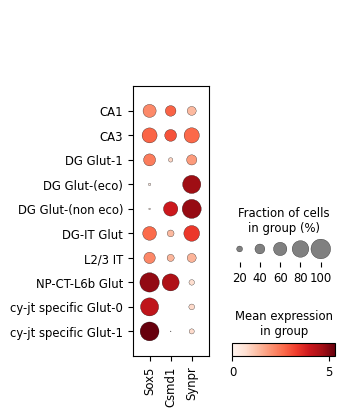

In [65]:
ax = sc.pl.dotplot(scdata, var_names = ['Sox5', 'Csmd1', 'Synpr'], 
                   groupby = 'new_anno',
                   show = False,
                   return_fig= True)
ax.savefig('TF_dotplot.pdf')